<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/resp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Response surface model

In [1]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from numpy.random import rand

Assume that you have found out that the temperature should be about 25C, pH about 8.0, and the amount of enzyme about 19 mg. Define an experimental domain with the centre point according to the values above (or your own best point, and with a range for each variable that is 10% of the full range given above

In [2]:
def experiment(X):
  Xspan=[25, 4, 20]
  Xmin=[20, 5, 5]
  Xscale=[]
  for a, b,c in zip(X, Xmin,Xspan):
    Xscale.append((a-b)/c)

  koeff=[[0.643, -0.686, -0.341], [0.704, 0.704, -0.087], [0.3, -0.184, 0.936]]
  koeff=np.array(koeff)

  max1=[0.21, 0.77, 0.68]
  cent1=[]
  for a,b in zip(Xscale, max1):
    cent1.append(a-b)

  koord1=np.matmul(koeff.T, cent1)
  max2=[0.73, 0.42, 0.19]
  cent2=[]
  for a, b in zip(Xscale, max2):
    cent2.append(a-b)

  Resp1=8/(0.1+2*koord1[0]*koord1[0]+0.5*koord1[1]*koord1[1]+0.9*koord1[2]*koord1[2])
  Resp2=1/(0.05+10*(np.sum(np.square(cent2), axis=0)))
  Resp=(15+Resp1+Resp2)+0.1*(rand()-rand()+rand()-rand()+rand()-rand()+rand()-rand()+rand()-rand()+rand()-rand())
  return Resp


In [3]:
# first try
#create list of data for high and low.
dat = [('T',20, 21.5, 23),
       ('p',5, 5.2, 5.4),
       ('A', 15, 15.8, 16.6)]

In [22]:
# second try
max=1
#create list of data for high and low.
dat = [('T',March_real.iloc[max].Temperature-0.5, March_real.iloc[max].Temperature, March_real.iloc[max].Temperature+0.5),
        ('p', March_real.iloc[max].pH-0.5, March_real.iloc[max].pH,  March_real.iloc[max].pH+0.5),
        ('A',March_real.iloc[max].Amount-0.5, March_real.iloc[max].Amount, March_real.iloc[max].Amount+0.5 )]

In [23]:
inputs_labels = {'T' : 'Temperature',
                 'p' : 'pH',
                 'A':'Amount'}



# create pandas dataframe in a pandas dataframe
inputs_df = pd.DataFrame(dat,columns=['index','low','center','high'])
inputs_df = inputs_df.set_index(['index'])
inputs_df['label'] = inputs_df.index.map( lambda z : inputs_labels[z] )

#print dataframe
inputs_df

,low,center,high,label
index,,,,
T,24.500000,25.000000,25.500000,Temperature
p,7.567959,8.067959,8.567959,pH
A,16.938156,17.438156,17.938156,Amount


In [24]:
# compute averages and span
inputs_df['average'] = inputs_df.apply( lambda z : ( z['high'] + z['low'])/2 , axis=1)
inputs_df['span'] = inputs_df.apply( lambda z : ( z['high'] - z['low'])/2 , axis=1)

# encode the data
inputs_df['encoded_low'] = inputs_df.apply( lambda z : ( z['low']  - z['average'] )/( z['span'] ), axis=1)
inputs_df['encoded_center'] = inputs_df.apply( lambda z : ( z['center'] - z['average'] )/( z['span'] ), axis=1)
inputs_df['encoded_high'] = inputs_df.apply( lambda z : ( z['high'] - z['average'] )/( z['span'] ), axis=1)

inputs_df = inputs_df.drop(['average','span'],axis=1)

inputs_df

,low,center,high,label,encoded_low,encoded_center,encoded_high
index,,,,,,,
T,24.500000,25.000000,25.500000,Temperature,-1.0,0.0,1.0
p,7.567959,8.067959,8.567959,pH,-1.0,0.0,1.0
A,16.938156,17.438156,17.938156,Amount,-1.0,0.0,1.0


In [25]:
import itertools
encoded_inputs= list(itertools.product([-1,1],[-1,1], [-1,1]))
encoded_inputs
for i in range(0,1):
    encoded_inputs.append((0,0,0))
encoded_inputs

[(-1, -1, -1),
 (-1, -1, 1),
 (-1, 1, -1),
 (-1, 1, 1),
 (1, -1, -1),
 (1, -1, 1),
 (1, 1, -1),
 (1, 1, 1),
 (0, 0, 0)]

In [26]:
results=pd.DataFrame(encoded_inputs)
results=results[results.columns[::-1]]
results.columns=['T','p', 'A']
results

,T,p,A
0,-1,-1,-1
1,1,-1,-1
2,-1,1,-1
3,1,1,-1
4,-1,-1,1
5,1,-1,1
6,-1,1,1
7,1,1,1
8,0,0,0


In [27]:
def parse_values(x):
    if x < 2:
       return x * 10
    elif x < 4:
       return x ** 2
    else:
       return x + 10

real_experiment = results
var_labels = []
for var in ['T','p', 'A']:
    var_label = inputs_df.loc[var]['label']
    var_labels.append(var_label)
    real_experiment[var_label] = results.apply(
        lambda z : inputs_df.loc[var]['low'] if z[var]<0 else (inputs_df.loc[var]['high'] if z[var]>0 else inputs_df.loc[var]['center']),
        axis=1)



print("The values of each real variable in the experiment:")
real_experiment[var_labels]

The values of each real variable in the experiment:


,Temperature,pH,Amount
0,24.5,7.567959,16.938156
1,25.5,7.567959,16.938156
2,24.5,8.567959,16.938156
3,25.5,8.567959,16.938156
4,24.5,7.567959,17.938156
5,25.5,7.567959,17.938156
6,24.5,8.567959,17.938156
7,25.5,8.567959,17.938156
8,25.0,8.067959,17.438156


In [28]:
resp=[]
for i in range(len(real_experiment.index)):
   X=[real_experiment.Temperature[i], real_experiment.pH[i],real_experiment.Amount[i]]
   resp.append(experiment(X))

results['y']= resp
results

,T,p,A,Temperature,pH,Amount,y
0,-1,-1,-1,24.5,7.567959,16.938156,72.135239
1,1,-1,-1,25.5,7.567959,16.938156,76.330051
2,-1,1,-1,24.5,8.567959,16.938156,84.009203
3,1,1,-1,25.5,8.567959,16.938156,81.232091
4,-1,-1,1,24.5,7.567959,17.938156,76.631848
5,1,-1,1,25.5,7.567959,17.938156,80.604476
6,-1,1,1,24.5,8.567959,17.938156,85.499900
7,1,1,1,25.5,8.567959,17.938156,82.514677
8,0,0,0,25.0,8.067959,17.438156,92.170754


In [29]:
results['y'].sort_values(ascending=False)
order=results['y'].sort_values(ascending=False).index
order

Index([8, 6, 2, 7, 3, 5, 4, 1, 0], dtype='int64')

In [30]:
y1 = results['y']
xlabs=['T','p','A']
x = results[xlabs]
x = sm.add_constant(x)

res1 = smf.ols(formula='y ~ T + p + A + T:p + T:A + A:p + T:p:A', data=results).fit()

res1.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                 -2.905
Method:                 Least Squares   F-statistic:                    0.1498
Date:                Mon, 30 Sep 2024   Prob (F-statistic):              0.964
Time:                        14:18:37   Log-Likelihood:                -24.940
No. Observations:                   9   AIC:                             65.88
Df Residuals:                       1   BIC:                             67.46
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.2365      3.866     21.014      0.030      32.116     130.357
T              0.3006      4.100      0.073      0.953     -51.799      52.401
p              3.4443      4.100      0.840      0.555     -48.656      55.544
A              1.4430      4.100      0.352      0.785     -50.657      53.543
T:p           -1.7412      4.100     -0.425      0.744     -53.841      50.359
T:A           -0.0538      4.100     -0.013      0.992     -52.154      52.046
A:p           -0.7497      4.100     -0.183      0.885     -52.850      51.350
T:p:A          0.0018      4.100      0.000      1.000     -52.098      52.102
==============================================================================
Omnibus:                       25.837   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.568
Skew:                           2.475   Prob(JB):                     0.000416
Kurtosis:                       7.125   Cond. No.                         1.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-values are high for the interaction coefficients

In [33]:
y1 = results['y']
xlabs=['T','p','A']
x = results[xlabs]
x = sm.add_constant(x)

res1 = smf.ols(formula='y ~ T + p + A', data=results).fit()

res1.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     1.146
Date:                Mon, 30 Sep 2024   Prob (F-statistic):              0.416
Time:                        14:20:46   Log-Likelihood:                -25.812
No. Observations:                   9   AIC:                             59.62
Df Residuals:                       5   BIC:                             60.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.2365      1.905     42.647      0.000      76.340      86.133
T              0.3006      2.020      0.149      0.888      -4.893       5.494
p              3.4443      2.020      1.705      0.149      -1.749       8.638
A              1.4430      2.020      0.714      0.507      -3.751       6.637
==============================================================================
Omnibus:                       13.504   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.718
Skew:                           1.676   Prob(JB):                       0.0573
Kurtosis:                       5.004   Cond. No.                         1.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This leaves with the first order model: ybar = 23.1511 + 0.6881T + 0.7681p +0.3016A  

So, now, for any t and T, we can predict y. This fits a flat surface and it tells us that the predicted y is a function of T, pH and A and the coefficients are the gradient of this function. We are working in coded variables, which means that the coefficients are unitless.

If we move 0.6881 in the direction of T and then 0.7681 and 0.3016 in the direction of pH and A, this will be the direction of steepest ascent. All we know is that this flat surface is one side of the "hill" forming our maxima.

With the method of steepest descent, we can now start marching up the hill taking additional measurements at each (T,pH, A) until the response starts to decrease. If we start at 0 (in coded units), then we can do series of single experiments on this path up the hill of the steepest ascent. If swe do this at a step size of t=1, then:



In [14]:
Origin = [results['T'].iloc[order[0]], results['p'].iloc[order[0]], results['A'].iloc[order[0]]]
coeff= res1.params
delta=[coeff[1]/coeff[1],coeff[2]/coeff[1],coeff[3]/coeff[1] ]
marchT=[Origin[0]];marchp=[Origin[1]];marcha=[Origin[2]]

for i in range(0,4):
    marchT.append(Origin[0]+(i+1)*delta[0])
    marchp.append(Origin[1]+(i+1)*delta[1])
    marcha.append(Origin[1]+(i+1)*delta[2])

March=pd.DataFrame({'T':marchT, 'p':marchp, 'A':marcha})
ypred=res1.predict(March)

March['ypred']=ypred


# Lets do the real experiment
#assume we take steps in T

Origin_real=[results['Temperature'].iloc[order[0]], results['pH'].iloc[order[0]], results['Amount'].iloc[order[0]]]
marchT_real=[];marchp_real=[];marcha_real=[]
for i in range(len(March)):
    marchT_real.append(Origin_real[0]+(i+1)*delta[0])
    marchp_real.append(Origin_real[1]+(i+1)*delta[1])
    marcha_real.append(Origin_real[2]+(i+1)*delta[2])

March_real=pd.DataFrame({'Temperature':marchT_real, 'pH':marchp_real, 'Amount':marcha_real})

resp=[]
for i in range(len(March_real)):
   X=[March_real.Temperature[i], March_real.pH[i],March_real.Amount[i]]
   resp.append(experiment(X))

March['y_real']= resp
March



<ipython-input-14-6700d3f4a22c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta=[coeff[1]/coeff[1],coeff[2]/coeff[1],coeff[3]/coeff[1] ]


,T,p,A,ypred,y_real
0,1.0,1.000000,1.000000,24.904530,42.886212
1,2.0,2.333979,1.419078,26.753123,92.246569
2,3.0,3.667959,1.838156,28.601716,47.593494
3,4.0,5.001938,2.257234,30.450309,26.301791
4,5.0,6.335917,2.676312,32.298902,20.532557


<Axes: >

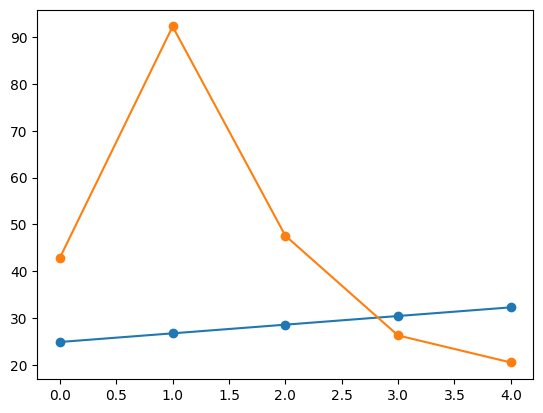

In [15]:
March['ypred'].plot(marker='o')
March['y_real'].plot(marker='o')


In [16]:
March['y_real'].sort_values(ascending=False)

,y_real
1,92.246569
2,47.593494
0,42.886212
3,26.301791
4,20.532557


In [21]:
March_real.iloc[1]


,1
Temperature,25.000000
pH,8.067959
Amount,17.438156


When ready, use higher order model...


In [36]:
res1 = smf.ols(formula='y ~ T + p + A + T:p + I(T**2) + I(p**2)', data=results).fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     35.98
Date:                Mon, 30 Sep 2024   Prob (F-statistic):            0.00703
Time:                        14:21:55   Log-Likelihood:                -9.6710
No. Observations:                   9   AIC:                             31.34
Df Residuals:                       3   BIC:                             32.53
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     92.1708      1.227     75.092      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


In [48]:
inputs_df #['low']

,low,center,high,label,encoded_low,encoded_center,encoded_high
index,,,,,,,
T,24.500000,25.000000,25.500000,Temperature,-1.0,0.0,1.0
p,7.567959,8.067959,8.567959,pH,-1.0,0.0,1.0
A,16.938156,17.438156,17.938156,Amount,-1.0,0.0,1.0


In [45]:

np.random.uniform(inputs_df['low'][0],inputs_df['high'][0], 100)

<ipython-input-45-29a030a4fc2a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.random.uniform(inputs_df['low'][0],inputs_df['high'][0], 100)


array([25.31495393, 25.42885175, 24.78698053, 25.29616647, 25.34007613,
       24.95943106, 24.66974161, 25.47420907, 24.93809968, 24.86970212,
       24.97436295, 25.48748371, 24.68647606, 25.01304369, 25.16584645,
       25.46834411, 25.33811142, 25.32326837, 25.37980377, 24.90946968,
       24.99343015, 24.56855849, 25.38782941, 25.13848193, 25.46404278,
       24.87132037, 25.43948019, 25.38286856, 25.1582225 , 25.39101524,
       24.7027704 , 24.50450096, 24.54942875, 25.48270036, 24.90734259,
       24.51167277, 25.34643313, 25.13135572, 24.64657412, 24.54229704,
       25.11861365, 25.46332171, 24.98496204, 25.1234037 , 25.13010537,
       25.09401072, 25.25359441, 24.8228765 , 24.7911813 , 24.6682636 ,
       25.34970349, 25.13775363, 25.4365824 , 24.50116646, 25.38749309,
       24.70640768, 24.98040079, 24.71512825, 25.21194496, 24.53819168,
       25.0512481 , 25.14044252, 24.6438114 , 24.71754306, 25.49497453,
       25.07755184, 25.22323798, 25.37286489, 25.17836772, 24.62

<ipython-input-58-74a0c88da2a1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T = np.random.uniform(inputs_df['encoded_low'][0],inputs_df['encoded_high'][0], 1000)
<ipython-input-58-74a0c88da2a1>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = np.random.uniform(inputs_df['encoded_low'][1],inputs_df['encoded_high'][1], 1000)
<ipython-input-58-74a0c88da2a1>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  A = np.random.unifor

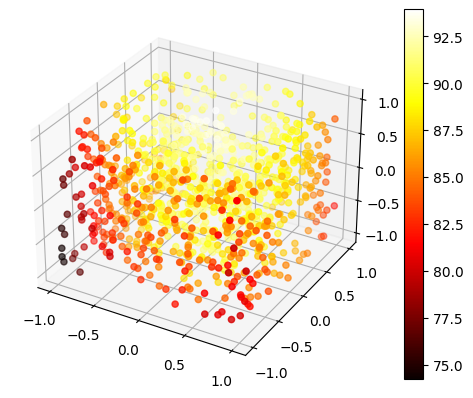

In [58]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

T = np.random.uniform(inputs_df['encoded_low'][0],inputs_df['encoded_high'][0], 1000)
p = np.random.uniform(inputs_df['encoded_low'][1],inputs_df['encoded_high'][1], 1000)
A = np.random.uniform(inputs_df['encoded_low'][2],inputs_df['encoded_high'][2], 1000)
data=pd.DataFrame({'T':T, 'p':p, 'A':A})

c = res1.predict(data)
data['ypred']=c
img = ax.scatter(T, p, A, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [66]:
data['ypred'].idxmax()
data.iloc[data['ypred'].idxmax()]

,842
T,-0.020440
p,0.343911
A,0.914498
ypred,93.951010
